<a href="https://colab.research.google.com/github/NadiaSevilla/Machine_Learning/blob/main/Class_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Connecting to kaggle Dataset

In [ ]:
#First install the kaggle library
! pip install kaggle

#Make a directory named “.kaggle”
! mkdir ~/.kaggle

#Copy the kaggle.json into this directory
! cp kaggle.json ~/.kaggle/

#Allocating permission
! chmod 600 ~/.kaggle/kaggle.json

#Note: The kaggle.json file needs to be uploaded everytime this notebook is loaded

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# The good stuff

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

## Obtaining and loading the dataset

In [ ]:
! kaggle datasets download uciml/mushroom-classification -f mushrooms.csv

#The downloaded dataset might take a while to download, but be patient! It is a bit shy

mushrooms.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Some context for various columns, as can be found in the kaggle page for the dataset:

- **class:** A mushroom can be edible (e) or poisonous (p)

- **cap-shape:** The cap can be shaped like a bell=b, conical=c, convex=x flat=f, knobbed=k or sunken=s

- **cap-surface:** The surface can be fibrous=f,grooves=g,scaly=y or smooth=s

- **cap-color:** The cap can be brown=n, buff=b, cinnamon=c, gray=g, green=r,pink=p, purple=u, red=e, white=w or yellow=y

- **bruises:** The mushroom either has (t) bruises or doesn't (f)

- **odor:** The mushroom can have any of the following smells: almond=a,anise=l, creosote=c, fishy=y, foul=f, musty=m ,pungent=p, spicy=s, or none (n)

- **gill-attachment:** The gill attachment can be described as attached=a, descending=d, free=f, or notched=n.

- **gill-spacing:** The gill spacing can be described as close=c,crowded=w,distant=d

- **gill-size:** The gill can either be broad=b or narrow=n

- **gill-color:** The color of the gill can be black=k, brown=n, buff=b,chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w or yellow=y

- **stalk-shape:** The stalk's shape can be either enlarging=e or tapering=t

- **stalk-root:** The stalk root can be bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, or be missing=?

- **stalk-surface-above-ring:** fibrous=f, scaly=y, silky=k, smooth=s

- **stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s

- **stalk-color-above-ring:** brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

- **stalk-color-below-ring:** brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p, red=e, white=w, yellow=y

- **veil-type:** partial=p, universal=u

- **veil-color:** brown=n, orange=o, white=w, yellow=y

- **ring-number:** none=n, one=o, two=t

- **ring-type:** cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

- **spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- **population:** abundant=a, clustered=c, numerous=n, scattered=s, several=v,solitary=y

- **habitat:** grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

## Simple preprocessing

In [ ]:
#In general there is not much to do here, besides tweaking labels for readibility's sake

df['bruises'] = df['bruises'].replace(['t', 'f'], ['yes', 'no'])
df['class'] = df['class'].replace(['e', 'p'], ['yes', 'no'])
df['ring-number'] = df['ring-number'].replace(['n', 'o', 't'], ['0', '1', '2'])
df.rename(columns={'bruises':'has-bruises', 'class':'is-edible'}, inplace=True)

df

,is-edible,cap-shape,cap-surface,cap-color,has-bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,no,x,s,n,yes,p,f,c,n,k,...,s,w,w,p,w,1,p,k,s,u
1,yes,x,s,y,yes,a,f,c,b,k,...,s,w,w,p,w,1,p,n,n,g
2,yes,b,s,w,yes,l,f,c,b,n,...,s,w,w,p,w,1,p,n,n,m
3,no,x,y,w,yes,p,f,c,n,n,...,s,w,w,p,w,1,p,k,s,u
4,yes,x,s,g,no,n,f,w,b,k,...,s,w,w,p,w,1,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,yes,k,s,n,no,n,a,c,b,y,...,s,o,o,p,o,1,p,b,c,l
8120,yes,x,s,n,no,n,a,c,b,y,...,s,o,o,p,n,1,p,b,v,l
8121,yes,f,s,n,no,n,a,c,b,n,...,s,o,o,p,o,1,p,b,c,l
8122,no,k,y,n,no,y,f,c,n,b,...,k,w,w,p,w,1,e,w,v,l


In [ ]:
df.columns

Index(['is-edible', 'cap-shape', 'cap-surface', 'cap-color', 'has-bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   is-edible                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   has-bruises               8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.describe()

,is-edible,cap-shape,cap-surface,cap-color,has-bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,yes,x,y,n,no,n,f,c,b,b,...,s,w,w,p,w,1,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
#Here I want to see if there is any column with only one unique value

print(df.loc[:, df.nunique() == 1])

     veil-type
0            p
1            p
2            p
3            p
4            p
...        ...
8119         p
8120         p
8121         p
8122         p
8123         p

[8124 rows x 1 columns]


As it turns out, there is. Now, out with it!

In [ ]:
df.drop(['veil-type'], axis=1, inplace=True)

In [ ]:
#Checking for null values

df.isnull().sum()

is-edible                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
has-bruises                 0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Univariate Analysis

### How many of the mushrooms studied in the dataset are edible?


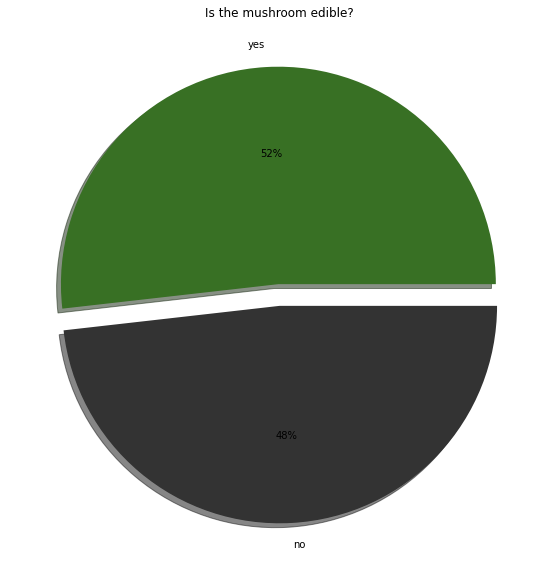

In [ ]:
# Defining colors for the pie chart
colors = ['#387024', '#333333']
  
# Define the ratio of gap of each fragment in a tuple
explode = (0.05, 0.05)
  

df['is-edible'].value_counts().plot(kind='pie', 
                                    #Shows percentages with no decimals
                                    autopct='%1.0f%%', 
                                    #Uses the defined colors
                                    colors=colors, 
                                    #Sets the separation between the categories
                                    explode=explode,
                                    #No legend box
                                    legend=False, 
                                    #Sets the title
                                    title='Is the mushroom edible?',
                                    #The slices have a little shadow underneath
                                    shadow=True,
                                    #The size
                                    figsize=(10, 10),
                                    #No label at the left
                                    ylabel='')

### Which are the most common cap shapes?

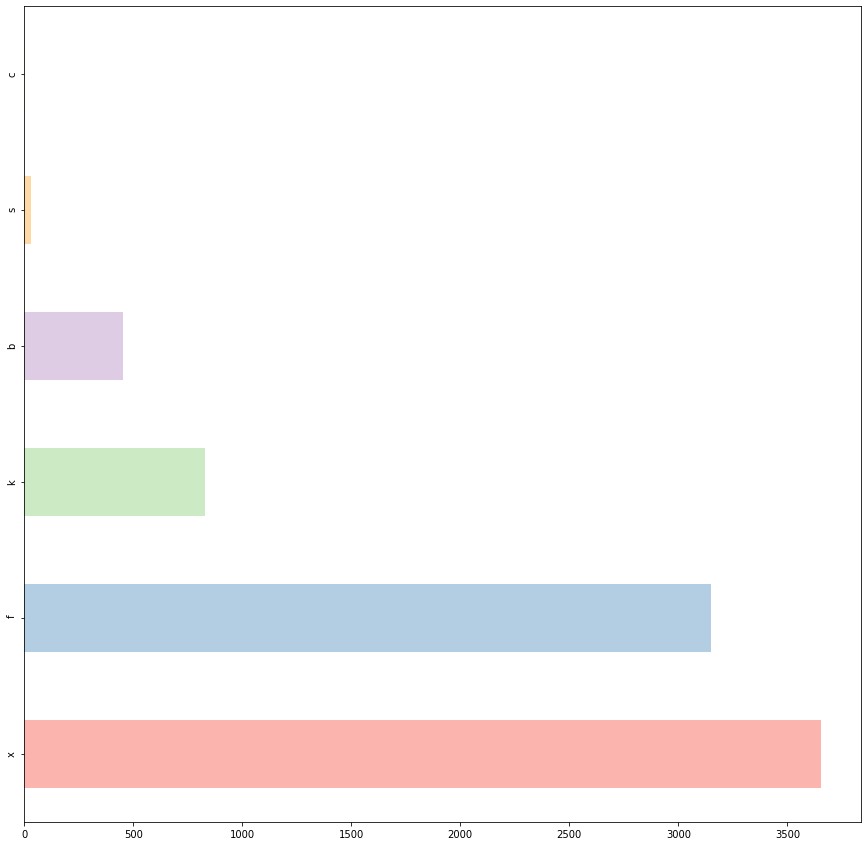

In [ ]:
cmap = cm.get_cmap('Pastel1') # Colour map (there are many others)


df['cap-shape'].value_counts().plot(kind='barh',
                                    stacked=True,
                                    color=cmap.colors,
                                    rot=90,
                                    figsize=(15, 15)
                                    ) 

### Which are the most common cap surface textures?


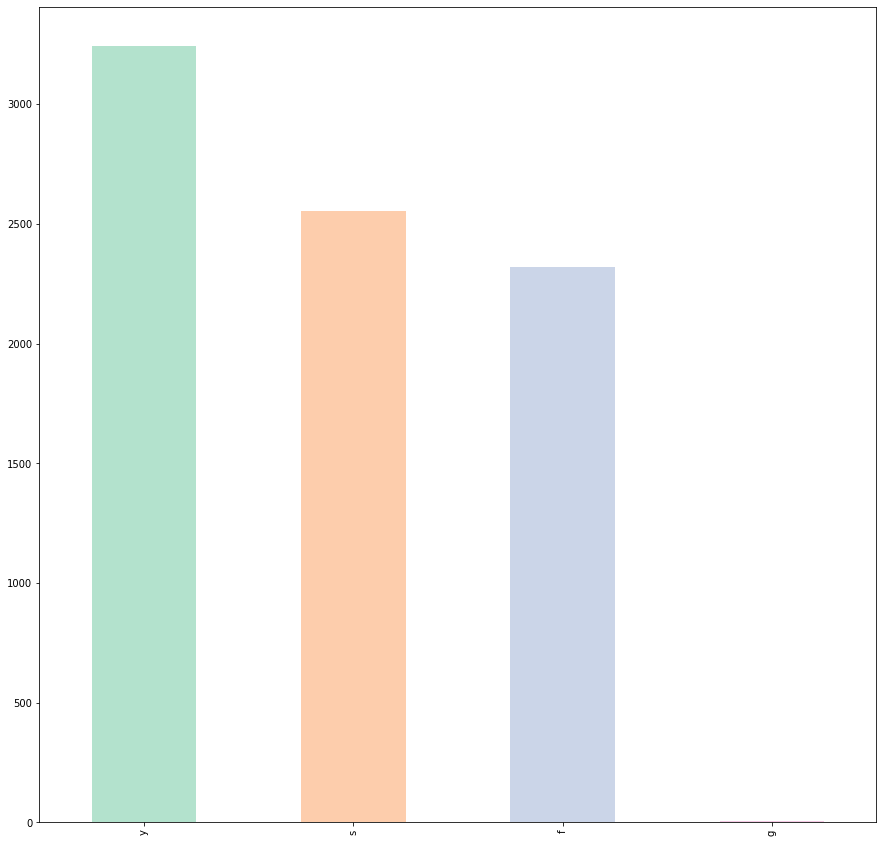

In [ ]:
cmap = cm.get_cmap('Pastel2') # Colour map (there are many others)
df['cap-surface'].value_counts().plot(kind='bar',
                                    stacked=True,
                                    color=cmap.colors,
                                    figsize=(15, 15)
                                    ) 

### Which are the most common cap colors?


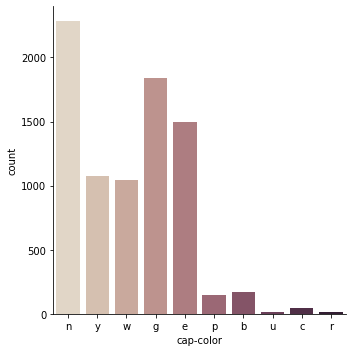

In [ ]:
sns.catplot(data=df, x="cap-color", kind="count", palette="ch:.25")
plt.show()

To summarize...

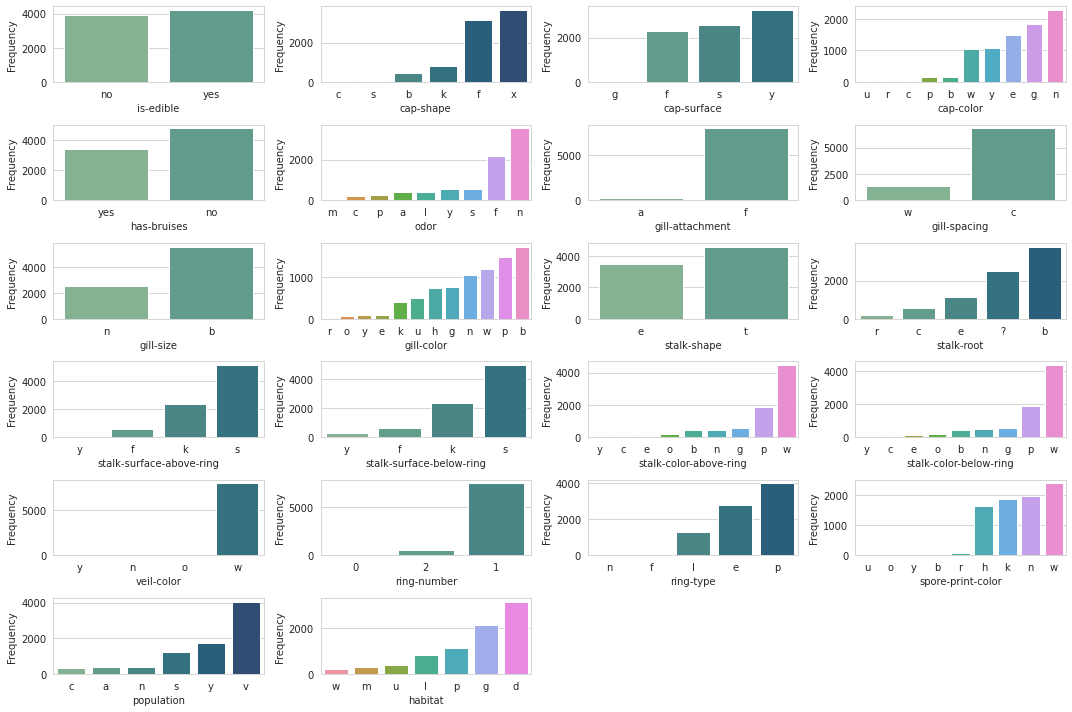

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns):
    sns.set_palette(sns.color_palette("crest"))
    ax = plt.subplot(6,4,i+1)
    sns.countplot(
        x=col, data = df, ax = ax, 
        order = df[col].value_counts(ascending=True).index
    )
    sns.set_style('whitegrid')
    
    plt.tight_layout()
    plt.ylabel("Frequency")
plt.show()

## Bivariate analysis

I need a measure of association between two categorical features; this can be done via Cramér’s V, which is a matrix based on a nominal variation of Pearson’s Chi-Square Test.

In [ ]:
import scipy.stats as ss

def cramers_v(x, y):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))

    #We get the dimensions:
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    # Cramér's V is computed by taking the square root of the chi-squared statistic divided by the sample size and the minimum dimension minus 1:
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

### Cramér's V matrix

In [ ]:
c_rows= []
for var in df.columns:
    cramers = cramers_v(df['is-edible'], df[var]) # Cramér's V test
    c_rows.append(round(cramers,3))

cramers_results = np.array(c_rows)
cramers_V_matrix = pd.DataFrame(cramers_results,columns = ['is-edible'] ,index = df.columns) 

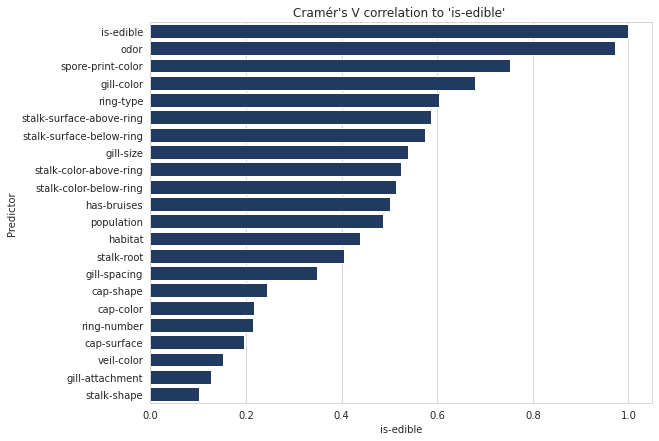

In [ ]:
fig, ax = plt.subplots(figsize = (9,7))
sns.barplot(y="index", x="is-edible", data = cramers_V_matrix[['is-edible']].sort_values('is-edible', ascending=False).reset_index(), color = "#15396A")
plt.title("Cramér's V correlation to 'is-edible' ")

plt.ylabel("Predictor")
plt.show()

As we can see, the variables which present a higher correlation with is-edible, i.e.m is a mushroom is poisonous or not, are: Itself (which is 1.0 and doesn't count), odor, spore-print-color, gill-color, and ring-type.

In [ ]:
cols = ['odor', 'spore-print-color', 'gill-color', 'ring-type']
for col in cols:
    display(pd.crosstab(df['is-edible'], df[col]))

odor,a,c,f,l,m,n,p,s,y
is-edible,,,,,,,,,
no,0,192,2160,0,36,120,256,576,576
yes,400,0,0,400,0,3408,0,0,0


spore-print-color,b,h,k,n,o,r,u,w,y
is-edible,,,,,,,,,
no,0,1584,224,224,0,72,0,1812,0
yes,48,48,1648,1744,48,0,48,576,48


gill-color,b,e,g,h,k,n,o,p,r,u,w,y
is-edible,,,,,,,,,,,,
no,1728,0,504,528,64,112,0,640,24,48,246,22
yes,0,96,248,204,344,936,64,852,0,444,956,64


ring-type,e,f,l,n,p
is-edible,,,,,
no,1768,0,1296,36,816
yes,1008,48,0,0,3152


As is possible to note in the analysis, it seems the odors a and l are strong indicators of a mushroom being edible, considering this predictor in a vacuum. In a similar vein, odors c, f and m seem to indicate a mushroom is poisonous.

Regarding spore print colors, b, o u and y seem to indicate a mushroom is edible, while color r indicates a mushroom is poisonous and colors like h and w indicate it is very likely the mushrooms will be poisonous, but with exceptions.

In general, it seems there are few predictors which indicate and absolute veredict all by themselves; however it seems that considering each one independently, and, as stated before, in a vacuum, the line is very clear cut; but not necesarilly accurate; this insights might yet prove useful for further classification analysis.

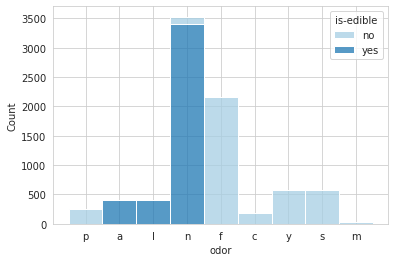

In [ ]:
sns.set_palette(sns.color_palette("Paired"))
sns.histplot(binwidth=0.5, 
             x= "odor", 
             hue="is-edible", 
             data=df, 
             stat="count", 
             multiple="stack")

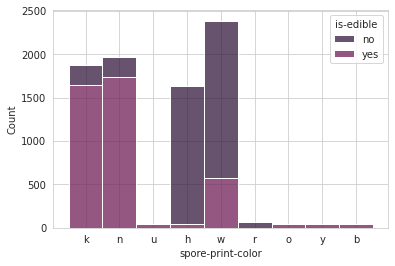

In [ ]:
sns.set_palette(sns.color_palette("rocket"))
sns.histplot(binwidth=0.5, 
             x= "spore-print-color", 
             hue="is-edible", 
             data=df, 
             stat="count", 
             multiple="stack")

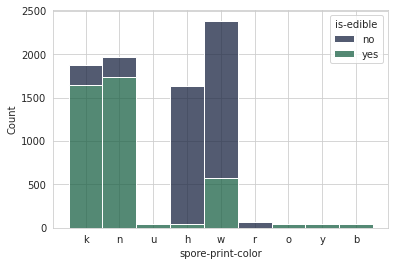

In [ ]:
sns.set_palette(sns.color_palette("cubehelix"))
sns.histplot(binwidth=0.5, 
             x= "spore-print-color", 
             hue="is-edible", 
             data=df, 
             stat="count", 
             multiple="stack")

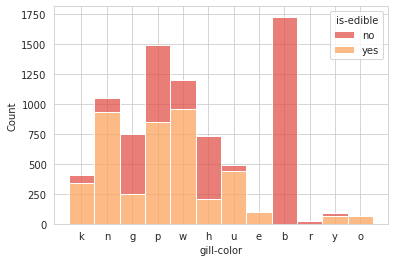

In [ ]:
sns.set_palette(sns.color_palette("Spectral"))
sns.histplot(binwidth=0.5, 
             x= "gill-color", 
             hue="is-edible", 
             data=df, 
             stat="count", 
             multiple="stack")

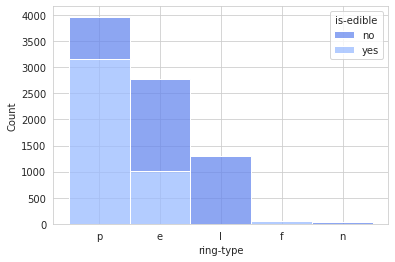

In [ ]:
sns.set_palette(sns.color_palette("coolwarm"))
sns.histplot(binwidth=0.5, 
             x= "ring-type", 
             hue="is-edible", 
             data=df, 
             stat="count", 
             multiple="stack")